<a href="https://colab.research.google.com/github/scottwmwork/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


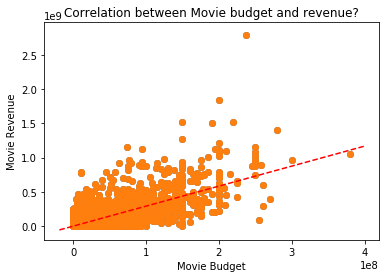

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example (We did not get to the material!)

#importing dataset of movies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/scottwmwork/datasets/master/tmdb_5000_movies.csv')
df['ones'] = np.ones(len(df.revenue)) # add column

#the following are calculations to find the line of best fit
X = df[['ones','budget']].as_matrix()         # creating len(df.ones) x len(df.budget) matrix
Y = df[['revenue']].as_matrix().reshape(-1,1) # creating a len(df.revenue) x 1 matrix
X_transpose = np.transpose(X)                 # transposing matrix
X_transpose_X = np.matmul(X_transpose, X)     # multiplying matrices
X_transpose_X_inv = np.linalg.inv(X_transpose_X) #inversing matrices
result = np.matmul(X_transpose_X, X_transpose_X_inv) #multiplying matrices
X_transpose_Y = np.matmul(X_transpose,Y)             #multiplying matrices
beta = np.matmul(X_transpose_X_inv, X_transpose_Y)   #finding beta


beta_0 = beta[0,0]
beta_1 = beta[1,0]

########################plot drawing###################################
plt.scatter(df['budget'],df['revenue'])
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = beta_0 + beta_1 * x_vals
plt.plot(x_vals, y_vals, '--', color='r') #line of best fit
plt.title('Correlation between Movie budget and revenue?')
plt.scatter(df.budget,df.revenue)
plt.xlabel('Movie Budget')
plt.ylabel('Movie Revenue')
plt.show()
#######################################################################

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

  I imported a data set of movies that have come out in the past   several years and found a line of best fit between the revenue and budget of the movie, then created a scatter plot comparing them to see if there is a correlation that can be made to make a hypothesis.

2.  What was the most challenging part of what you did?
      
It was challenging to calculate the betas for finding the best line of fit, but since I did something somewhat similar in the precourse, I was able to accomplish it. 
      

3.  What was the most interesting thing you learned?
      
      I learned that the higher a movie budget has, the less likely it is to earn that money back in revenue or even earn profit

4.  What area would you like to explore with more time?
  
I would like to find more correlations between multiple variables in order to make predictions.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.